In [1]:
import trig_poly
import dual_certificates
import test_data
import numpy as np
import plt_util
import phase_transition
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
def kernel_matrix(kernel, support):
    shifted_supports = np.outer(np.ones(N), support) - np.outer(support, np.ones(N))
    return kernel.eval(shifted_supports).real

In [30]:
fc = 30
min_separation = 0.7 / fc
N = int(0.5 / min_separation)

# kernel = trig_poly.TrigPoly.multi_dirichlet(fc, [2.0])
kernel = trig_poly.TrigPoly.dirichlet(fc)

support = test_data.uniform_supports(N, min_separation=min_separation)

K0 = kernel_matrix(kernel, support)
K1 = kernel_matrix(kernel.derivative(), support)
K2 = kernel_matrix(kernel.derivative().derivative(), support)

In [31]:
print 'Desired min separation:', min_separation
print 'Actual min separation: ', np.min(support[1:] - support[:-1])

Desired min separation: 0.0233333333333
Actual min separation:  0.024235453332151158


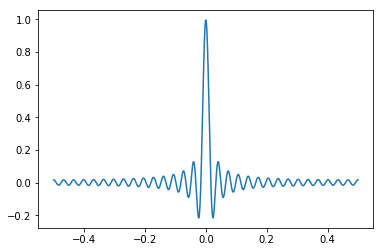

In [32]:
xs = np.linspace(-0.5, 0.5, 500)
plt.plot(xs, kernel(xs))

In [33]:
alphas = np.zeros((N, N))
for k in range(N):
    target = np.zeros(N)
    target[k] = 1.0
    alphas[:, k] = np.linalg.solve(K0 - np.outer(K1[:, k], K1[:, k]) / K2[0, 0], target)

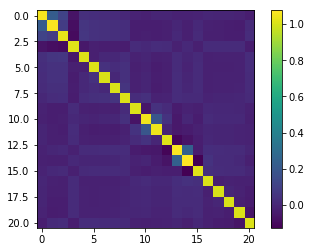

In [34]:
plt.imshow(alphas)
plt.colorbar()

In [35]:
# Retrieve polynomial component per dimension
qs = []
for k in range(N):
    components = [
        (kernel.shift(-support[j]) + kernel.derivative().shift(-support[k]) * (K1[j, k] * (-1.0 / K2[0, 0]))) * alphas[j, k]
        for j in range(N)]
    qs.append(sum(components, trig_poly.TrigPoly.zero()))

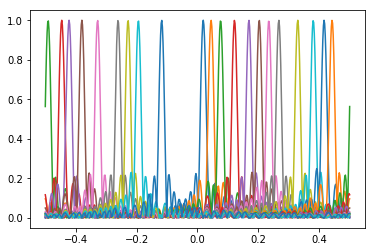

In [36]:
# Check that interpolation problem is solved
xs = np.linspace(-0.5, 0.5, 500)
for i in range(N):
    plt.plot(xs, np.absolute(qs[i](xs)))

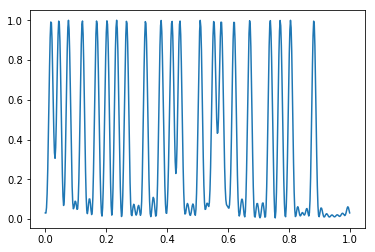

In [45]:
# Check that interpolation problem is solved
xs = np.linspace(0.0, 1.0, 500)
plt.plot(xs, sum([np.absolute(qs[i](xs)) ** 2 for i in range(N)]))

In [63]:
Norm = sum([qk * qk.conjugate() for qk in qs], trig_poly.TrigPoly.zero()) * 0.5
Norm1 = Norm.derivative()
Norm2 = Norm1.derivative()

In [66]:
support

array([0.01895317, 0.04475068, 0.07602384, 0.12164415, 0.16898326,
       0.20293045, 0.2344225 , 0.26724811, 0.3294423 , 0.38040241,
       0.41605078, 0.44227621, 0.50924885, 0.55389821, 0.57813366,
       0.62021992, 0.67180616, 0.73905705, 0.77189883, 0.80576078,
       0.8823799 ])

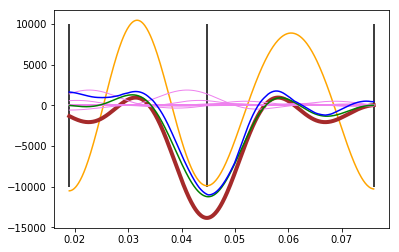

In [80]:
support_pt_k = 1
support_pt = support[support_pt_k]
eps = min_separation
xs = np.linspace(support[support_pt_k - 1], support[support_pt_k + 1], 500)

for k in range(N):
    first_term_k = (qs[k].conjugate() * qs[k].derivative().derivative())(xs).real
    color = ('red' if k == support_pt_k else 'blue')
    # plt.plot(xs, first_term_k, c=color)
    
for k in range(N):
    second_term_k = (qs[k].derivative() * qs[k].derivative().conjugate())(xs)
    # plt.plot(xs, second_term_k, c='green')
    
plt.plot(xs, Norm2(xs), c='orange')
   
main_expanded_term = (
    kernel.shift(-support_pt) * 
    kernel.derivative().derivative().shift(-support_pt) * 
    np.absolute(alphas[support_pt_k, support_pt_k]) ** 2)
plt.plot(
    xs, 
    main_expanded_term(xs),
    c='brown', linewidth=4.0)
    
first_cross_terms = []
for k in range(N):
    for ell in range(N):
        if k == support_pt_k and ell == support_pt_k:
            continue
        
        first_cross_terms.append(
            kernel.shift(-support[k]) * 
            kernel.derivative().derivative().shift(-support[ell]) * 
            alphas[support_pt_k, k] * np.conj(alphas[support_pt_k, ell]))
        plt.plot(
            xs, 
            first_cross_terms[-1](xs).real,
            c='violet', linewidth=1.0)

plt.plot(
    xs,
    (main_expanded_term + sum(first_cross_terms, trig_poly.TrigPoly.zero()))(xs).real,
    c='green')

plt.plot(
    xs,
    main_expanded_term(xs) + sum([np.absolute(t(xs).real) for t in first_cross_terms]),
    c='blue')
        
plt.gca().vlines(support[support_pt_k - 1:support_pt_k + 2], -10000, 10000, color='black')